# Atividade 3

## Questão 1

### Interpretação Geométrica

Temos três superfícies no sistema. Respectivamente,

1. Esfera centrada na origem e de raio dois.
2. Elipsoide centrado na origem de eixos $3$ e $\sqrt{2}$
3. A terceira figura tem o formato semelhante a uma onda.

Plotando o gráfico dessas figuras no Mathematica (veja 'atividade_3_img01.png'), observamos que a esfera e o elipsoide se intersectam em dois círculos, o elipsoide e a onda se encontram em três parábolas enquanto que a esfera e a onda se encontram em duas parábolas.

Temos duas interseções entre as três figuras, uma acontecendo quando $y < 0$ e a outra, quando $y > 0$. Ou seja, temos uma interseção para $y$ positivo.

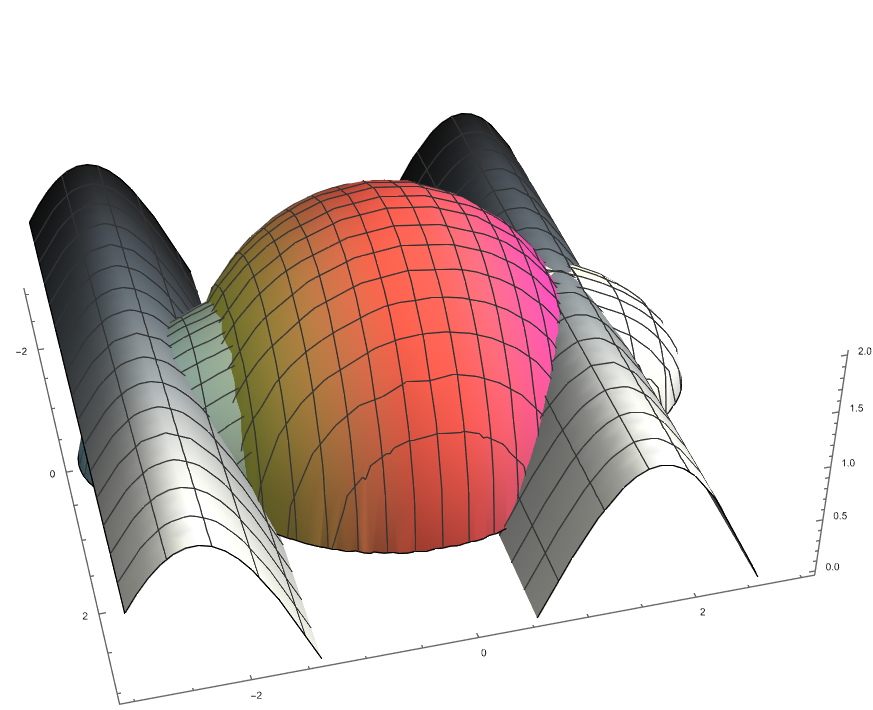

O código para o gráfico no Mathematica está disponível em 'atividade_3.nb'.
```
p1 = Plot3D[Sqrt[4 - x^2 - y^2], {x, -3, 3}, {y, -3, 3}, 
  ColorFunction -> Function[{x, y}, ColorData["NeonColors"][y]]]
p2 = Plot3D[Sqrt[(2/9)*(9 - y^2 - (9/2)*x^2)], {x, -3, 3}, {y, -3, 3},
   ColorFunction -> Function[{x, y}, ColorData["LightTerrain"][y]]]
p3 = Plot3D[
  Sqrt[10/7]*Sin[(Pi/2)*(y - Sqrt[18/7] + 1)], {x, -3, 3}, {y, -3, 3},
   ColorFunction -> Function[{x, y}, ColorData["GrayTones"][x]]]
Show[p1, p2, p3]
```

### Solução utilizando método de Newton

Utilizamos a implementação do método de Newton disponível em 'nonlinear_newton.m'.

In [1]:
function solution = backsubstitution(A, b, n)

x(n) = b(n)/A(n,n);
k = n;

while k>1
    k = k-1;
    soma = b(k);
    j = k;
    while j<n
        j = j+1;
        soma = soma - A(k,j)*x(j);
    end
    x(k) = soma/A(k,k);
end
solution = x;
end

function x = gausseliminationpivot(A, b, n)
    for k=1:n-1
        
        % Finds the pivot
        max = abs(A(k,k));
        maxv = k;
        for i=k+1:n
            if abs(A(i,k)) > max
                max = abs(A(i,k));
                maxv = i;
            end
        end
        % fprintf("Pivot: %f\n", max); 
        
        % Exchanges
        mem = A(k,:);
        A(k,:) = A(maxv,:);
        A(maxv,:) = mem;
        mem = b(k,:);
        b(k,:) = b(maxv,:);
        b(maxv,:) = mem;
        % fprintf("New matrix: \n");
        % disp(A);
        % fprintf("\nNew b: \n");
        % disp(b);
        
        % Gauss elimination procedure
        for i = k+1:n
            m = A(i,k) / A(k,k);
            A(i,k) = m;
            b(i, :) = b(i, :) - m * b(k, :);
            for j=k+1:n
                A(i,j) = A(i,j) - m * A(k,j);
            end  
        end
    end
    x = backsubstitution(A, b, n);
end

function x = nonlinear_newton(F,J,x_k,epsilon)

k = 0;
while 1
    Fk = feval(F,x_k);
    Jk = feval(J,x_k);

    if norm(Fk, Inf) < epsilon
        x = x_k;
        return
    else
        % s_k = -Jk\Fk;
        [row, ~] = size(Jk);
        s_k = gausseliminationpivot(-Jk, Fk, row);
        s_k = s_k.';
        x_k = x_k + s_k;
        if norm((x_k - (x_k - s_k)),Inf) < epsilon
            x = x_k;
            return
        else
            k = k+1;
        end
    end
end
end

Adicionando as funções $F(X)$ e $J(X)$, onde $X = (x,y,z)$ e $J(X)$ é o jacobiano da função $F(X)$ e aplicando o método a partir de um ponto inicial $x_k = (1,0.1,1)^T$ temos que:

In [2]:
F = @(X)[X(1)^2 + X(2)^2 + X(3)^2 - 4; (9/2)*(X(1)^2 + X(3)^2)+X(2)^2-9; X(3)-sqrt(10/7)*sin((pi/2)*(X(2)-sqrt(18/7)+1))];
J = @(X)[2*X(1), 2*X(2), 2*X(3); 9*X(1), 2*X(2), 9*X(3); 0, -(7^(1/2)*10^(1/2)*pi*cos((pi*(X(2) - (3*2^(1/2)*7^(1/2))/7 + 1))/2))/14, 1];
x_k = [1;0.1;1];
epsilon = 10^(-3);
x = nonlinear_newton(F,J,x_k,epsilon);
display(x);

x =

  -0.010229
   1.603567
   1.195229



Portanto, a solução aproximada do sistema é $\begin{bmatrix} \bar{x} \\ \bar{y} \\ \bar{z} \end{bmatrix} \approx \begin{bmatrix}-0.010229 \\ 1.603567 \\ 1.195229 \end{bmatrix}$.

De fato, temos que o erro é menor do que $\varepsilon = 10^{-3}$.

In [3]:
erro = abs(F(x))

erro =

   1.0462e-04
   4.7081e-04
            0



### Demonstração da convergência

Tomando $\Omega_0 = \{ (x,y,z) \in \mathbb{R}^3 : x > 0, y > 0, z > 0 \}$ como subconjunto do domínio de $F(X)$, sabemos do item anterior que há um único zero de $F(X)$ em $\Omega_0$.

Como o jacobiano $J(X)$ tem como entradas polinômios ou função cosseno, temos que as derivadas de $F(X)$ são contínuas em todo $\mathbb{R}^3$, particularmente em $\Omega_0$.

Calculando o determinante de $J(X)$, temos que $ \text{det}(J) = -14XY$. Portanto, $\text{det}(J) \neq 0 \, \forall X,Y \neq 0 $.

Por último, vamos verificar se a condição de Lipschitz é satisfeita. Denotando por $V(i)$ o i-ésimo elemento do vetor $V$, observe que $\| J(Y) - J(Z) \|_{\infty}$ é dado por

$
\left\|
\begin{bmatrix}
2Y(1)-2Z(1) && 2Y(2)-2Z(2) && 2Y(3) - 2Z(3) \\
9Y(1)-9Z(1) && 2Y(2)-2Z(2) && 9Y(3)-9Z(3) \\
0 && -\frac{\sqrt{70} \pi \cos{\left( \frac{(\pi (Y(2) - \frac{(3 \sqrt{14})}{7} + 1)}{2} \right)}}{14}  + \frac{\sqrt{70} \pi \cos{\left( \frac{(\pi (Z(2) - \frac{(3 \sqrt{14})}{7} + 1)}{2}\right)}}{14}  && 1 - 1
\end{bmatrix} \right\|_{\infty}
$

Ou seja, $\| J(Y) - J(Z) \|_{\infty} = \max \left\{|2(Y(1)-Z(1))| + |2(Y(2)-Z(2))| + |2(Y(3)-Z(3))|, |9(Y(1)-Z(1))| + |2(Y(2)-Z(2))| + |9(Y(3)-Z(3))|, \left|-\frac{\sqrt{70} \pi \cos{\left( \frac{(\pi (Y(2) - \frac{(3 \sqrt{14})}{7} + 1)}{2} \right)}}{14}  + \frac{\sqrt{70} \pi \cos{\left( \frac{(\pi (Z(2) - \frac{(3 \sqrt{14})}{7} + 1)}{2}\right)}}{14} \right| \right\}$.

Portanto, vale que $\| J(Y) - J(Z) \|_{\infty} \leq 9|(Y(1)-Z(1))|+2|2(Y(2)-Z(2))|+9|2(Y(3)-Z(3))| \leq 9 \max_{i=1,2,3} |(Y(i)-Z(i))| + 2 \max_{i=1,2,3} |(Y(i)-Z(i))| + 9 \max_{i=1,2,3} |(Y(i)-Z(i))| \leq 20 \| Y - Z \|_{\infty}$. Portanto, existe uma constante $\gamma$ satisfazendo $\| J_F(Y) - J_F(Z) \| \leq \gamma \| Y - Z \|$. Isto é, a condição de Lipschitz é satisfeita.

Resumindo o que obtivemos até agora:

- Intervalo $\Omega_0$ contém apenas uma única solução.
- F é diferenciável em $\Omega_0$.
- $\text{det}(J) \neq 0 \, \forall X,Y,Z > 0$.
- A condição de Lipschitz é satisfeita.

Logo, para um $x_0 \in \Omega_0$, o método de Newton converge para a solução do sistema.

Obs: obtem-se o jacobiano executando `A = jacobian([X^2 + Y^2 + Z^2 - 4, (9/2)*(X^2 + Z^2)+Y^2-9, Z-sqrt(10/7)*sin((pi/2)*(Y-sqrt(18/7)+1))],[X,Y,Z])`.
```
A =
 
[ 2*X,                                                                   2*Y, 2*Z]
[ 9*X,                                                                   2*Y, 9*Z]
[   0, -(7^(1/2)*10^(1/2)*pi*cos((pi*(Y - (3*2^(1/2)*7^(1/2))/7 + 1))/2))/14,   1]
```

## Exercício 2

### Encontrar aproximação com Crank-Nicolson

In [4]:
function raiz = pontofixo2(phi, x_0, epsilon)

k = 0;
error = epsilon + 1;

if abs(phi(x_0)) < epsilon
    raiz = x_0;
else
    while (abs(phi(x_0)) >= epsilon) && (abs(error) >= epsilon)
        k = k+1;
        x = phi(x_0);
        error = abs(x - x_0);
        x_0 = x;
    end
end
raiz = x;
end

function y = crank_nicolson(fun,xbar,x0,y0,h)
    epsilon = 0.0001;
    while x0 <= xbar-h
        phi = @(y) y0 + h/2 * (fun(x0,y0) + fun(x0+h,y));
        y = pontofixo2(phi, x0+h, epsilon);
        y0 = y;
        x0 = x0+h;
    end
end

In [5]:
fun = @(x,y) cos(y^2) + x;
x0 = 1;
y0 = 2;
xbar = 3;
h = 10^(-4);
est = crank_nicolson(fun,xbar,x0,y0,h);
fprintf("Solução aproximada pelo método de Crank Nicolson: %f\n", est);

Solução aproximada pelo método de Crank Nicolson: 5.635420


## Estimativa dos erros

Primeiro, vamos implementar os métodos:

In [6]:
% Método de Euler Explícito
function y = prog_euler(fun,xbar,x0,y0,h)
    while x0 <= xbar-h
        y = y0+h*fun(x0,y0);
        y0 = y;
        x0 = x0+h;
    end
end

% Método de Euler Implícito
function y = back_euler(fun,xbar,x0,y0,h)
    epsilon = 0.0001;
    while x0 <= xbar-h
        phi = @(y) y0+h*fun(x0+h,y);
        y = pontofixo2(phi, x0+h, epsilon);
        y0 = y;
        x0 = x0+h;
    end
end

Erros no método de Euler Progressivo:

In [7]:
erro_progressivo = [];
valor_encontrado = [];
h = [1*10^(-2), 0.5*10^(-2), 0.25*10^(-2), 1*10^(-3)];
n = [];

for iter=1:length(h)
    yk = prog_euler(fun,xbar,x0,y0,h(iter));
    valor_encontrado(end+1) = yk;
    erro = abs(yk-est);
    erro_progressivo(end+1) = erro;
    
    ns = xbar / h(iter);
    n(end+1) = ns;
end

% O método table apenas funciona no MatLab
% n = n.';
% h = h.';
% erro_progressivo = erro_progressivo.';
% valor_encontrado = valor_encontrado.';
% tabela_progressivo = table(n,h,erro_progressivo,valor_encontrado)

display(n);
display(h);
display(erro_progressivo);
display(valor_encontrado);

n =

    300.00    600.00   1200.00   3000.00

h =

   1.0000e-02   5.0000e-03   2.5000e-03   1.0000e-03

erro_progressivo =

   2.5896e-02   1.2981e-02   6.3398e-03   2.3198e-03

valor_encontrado =

   5.6095   5.6224   5.6291   5.6331



o que nos dá a seguinte tabela de erros no método de Euler Progressivo:

```
     n        h       erro_progressivo    valor_encontrado
    ____    ______    ________________    ________________

     300      0.01        0.025896             5.6095     
     600     0.005        0.012981             5.6224     
    1200    0.0025       0.0063398             5.6291     
    3000     0.001       0.0023198             5.6331     
```

No método de Euler Regressivo:

In [8]:
erro_regressivo = [];
valor_encontrado_r = [];
h = [1*10^(-2), 0.5*10^(-2), 0.25*10^(-2), 1*10^(-3)];
n = [];

for iter=1:length(h)
    yk = back_euler(fun,xbar,x0,y0,h(iter));
    valor_encontrado_r(end+1) = yk;
    erro = abs(yk-est);
    erro_regressivo(end+1) = erro;
    
    ns = xbar / h(iter);
    n(end+1) = ns;
end

% O método table apenas funciona no MatLab
% n = n.';
% h = h.';
% erro_regressivo = erro_regressivo.';
% valor_encontrado_r = valor_encontrado_r.';
% tabela_regressivo = table(n,h,erro_regressivo,valor_encontrado_r)

display(n);
display(h);
display(erro_regressivo);
display(valor_encontrado_r);

n =

    300.00    600.00   1200.00   3000.00

h =

   1.0000e-02   5.0000e-03   2.5000e-03   1.0000e-03

erro_regressivo =

   2.7112e-02   1.3884e-02   7.2371e-03   3.0927e-03

valor_encontrado_r =

   5.6625   5.6493   5.6427   5.6385



o que nos dá a seguinte tabela de erros no método de Euler Regressivo:

```
     n        h       erro_regressivo    valor_encontrado_r
    ____    ______    _______________    __________________

     300      0.01        0.027112             5.6625      
     600     0.005        0.013884             5.6493      
    1200    0.0025       0.0072371             5.6427      
    3000     0.001       0.0030927             5.6385      
```

Em ambos os casos, como o erro descresce linearmente com $h$, temos que de fato $|e_k| \leq Ch$, onde $C$ é constante. Ou seja, o erro é de ordem $\mathcal{O}(h)$.